## Análise das Barragens e Impactos Ambientais por Município e Empresa

**João Pedro Cobra Casici e Gabriel Maciel Souza**

### 1. Distribuição de Dano Potencial por Município

**Tese:**

_A estrutura de governança e fiscalização de barragens está insuficiente em municípios com maior concentração de barragens de alto potencial de dano, prejudicando a segurança hídrica e ambiental local._

**Desenvolvimento:**

1. **Pré-condição dos Dados:**
   - O código corrige possíveis inconsistências nos nomes dos municípios, garantindo que os dados estejam padronizados. Além disso, apenas municípios com mais de 15 barragens são considerados, focando a análise em áreas com maior densidade de barragens.

2. **Distribuição dos Danos Potenciais:**
   - A categorização dos danos potenciais em **Alta**, **Média** e **Baixa** ajuda a entender a gravidade dos riscos associados a cada município.
   - O gráfico empilhado facilita a visualização da quantidade e da intensidade dos danos potenciais comparativamente entre os municípios.

3. **Análise Comparativa:**
   - A análise evidencia que alguns municípios possuem um número alarmante de barragens com alto potencial de dano, o que exige maior atenção das autoridades.
   - Ao mesmo tempo, municípios com menores categorias de dano podem estar em melhor conformidade com as normas de segurança ou possuem menos infraestrutura de barragens.

4. **Implicações para Políticas Públicas:**
   - Políticas voltadas à fiscalização e manutenção de barragens devem priorizar municípios com maior concentração de barragens de alto potencial de dano.
   - Investimentos em tecnologia e treinamento para a detecção e mitigação de riscos em barragens são essenciais para melhorar a segurança hídrica e ambiental.
   - A transparência e o envolvimento da comunidade local nas discussões sobre a segurança das barragens podem contribuir para uma gestão mais eficiente e sustentável.

### 2. Impacto Ambiental - Top 10 Empresas

**Tese:**

_Algumas empresas concentram um alto número de impactos ambientais negativos, sugerindo uma necessidade urgente de políticas regulatórias mais rígidas e de práticas empresariais mais sustentáveis._

**Desenvolvimento:**

1. **Pré-condição dos Dados:**
   - Ao considerar os registros de impacto ambiental, o código filtra e agrupa os dados por "Empreendedor" e "Impacto Ambiental", garantindo um foco preciso nas consequências ambientais associadas a cada empresa.

2. **Top 10 Empresas:**
   - A visualização está centrada nas 10 empresas com a maior quantidade de impactos ambientais, destacando aquelas com práticas potencialmente mais prejudiciais ao meio ambiente.
   - A eliminação de valores ausentes no dataset assegura a precisão da análise ao evitar contagens distorcidas.

3. **Distribuição dos Impactos:**
   - O gráfico empilhado mostra a distribuição e a frequência dos tipos de impactos ambientais para cada empresa, permitindo identificar quais empresas lideram em termos de impacto negativo.
   - A utilização do colormap 'viridis' melhora a diferenciação visual entre os diversos tipos de impactos ambientais.

4. **Análise Comparativa:**
   - Empresas com maior número de impactos ambientais precisam ser avaliadas criticamente para entender as fontes dos problemas e as possíveis lacunas nas políticas internas de sustentabilidade.
   - Empresas com impactos reduzidos ou ausentes podem servir como modelo de boas práticas, apresentando operações mais alinhadas aos conceitos de responsabilidade ambiental.

5. **Implicações para Políticas Públicas:**
   - A regulamentação ambiental deve ser reforçada, com foco em auditorias e monitoramento das práticas das empresas com maiores registros de impactos.
   - Incentivos para adoção de tecnologias limpas e práticas sustentáveis podem ajudar a reduzir o impacto ambiental de grandes empreendedores.
   - Transparência e accountability das empresas perante a sociedade e órgãos reguladores são cruciais para promover comportamentos corporativos mais responsáveis.

**Conclusão:**

Conclui-se assim por meio da análise da tabela de dados a respeito de barragens de rejeitos de minérios que alguns minicípios como: (Nova Lima, Mariana, Ouro Preto e Brumadinho) estão mais vulneráveis em casos de catastrofes envolvendo barragens por sua proximidade com barragens que apresentam maior dano potencial. 

Importação das bibliotecas

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from scipy.stats import skew, kurtosis
import re

Carregamento e leitura do arquivo CSV

In [4]:
data_path = 'Barragens.csv'
data = pd.read_csv(data_path, sep=",", encoding="latin-1", on_bad_lines="skip")

empresa = data["Empreendedor"]
municipio = data["Municipio"]
cat_risco = data["Categoria de Risco - CRI"]
dano_potencial = data["Dano Potencial Associado - DPA"]
nivel_emergencia = data["Nivel de Emergencia"]
impacto_ambiental = data["Impacto ambiental"]
gestao = data["Gestao Operacional"]
volume_atual = data["Volume atual do Reservatorio"]
capacidade_total = data["Capacidade Total do Reservatorio"]

Corrigir arquivo CSV.

In [17]:
def corrigir_texto_1(texto):
    if isinstance(texto, str):
        texto_corrigido = texto.replace("Media", "Média") 
        texto_corrigido = re.sub(r'[^a-zA-Z0-9\s]', '', texto_corrigido)
        texto_corrigido = re.sub(r'\s+', ' ', texto_corrigido)
        return texto_corrigido.strip()
    return texto

data['Municipio'] = data['Municipio'].apply(corrigir_texto_1)

Desenhar gráfico de quantidade de barragens por município apenas para municípios com mais de 10. 

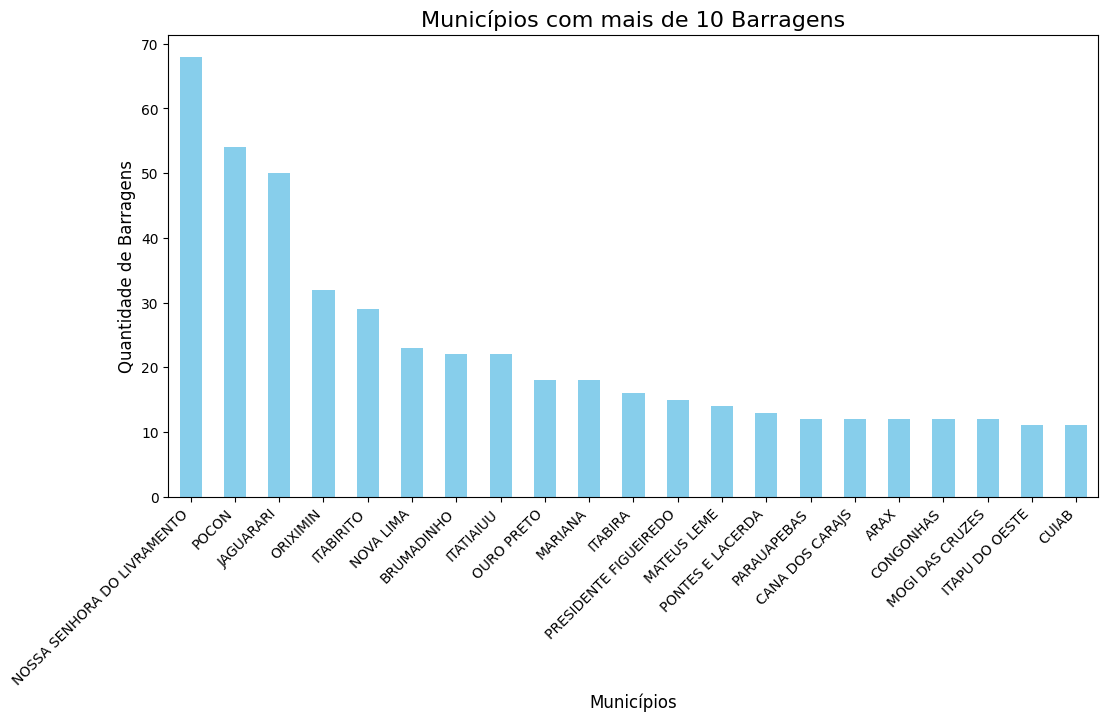

In [18]:
if "Municipio" in data.columns:
    contagem_municipios = data["Municipio"].dropna().value_counts()

data['Municipio'] = data['Municipio'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('latin-1')

municipios_contagem = data['Municipio'].value_counts()

municipios_filtrados = municipios_contagem[municipios_contagem > 10]

plt.figure(figsize=(12, 6))
municipios_filtrados.plot(kind='bar', color='skyblue')
plt.title('Municípios com mais de 10 Barragens', fontsize=16)
plt.xlabel('Municípios', fontsize=12)
plt.ylabel('Quantidade de Barragens', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


Gráfico de número de barragens e seu dano pontecial.

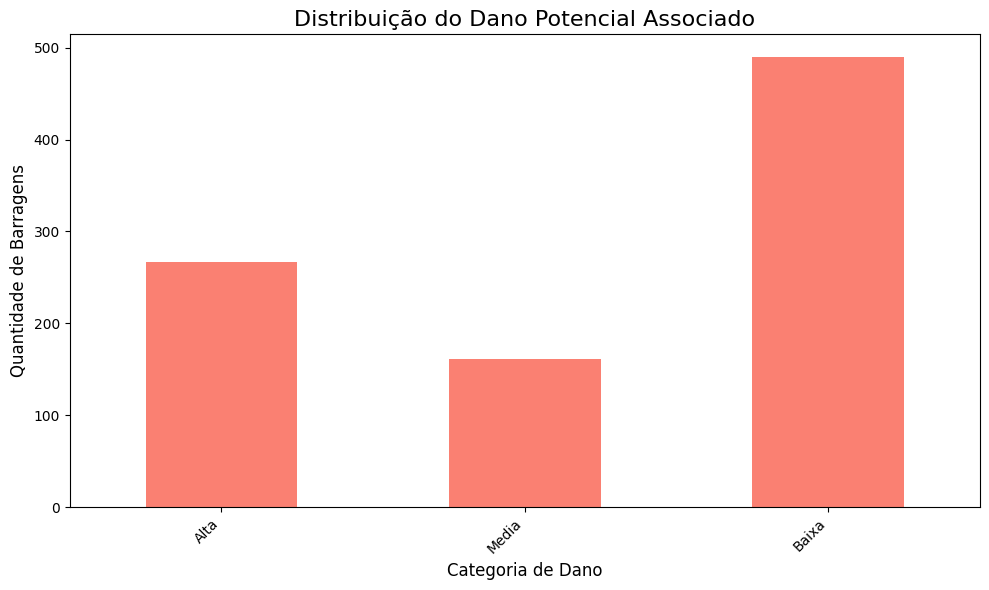

In [19]:
data.columns = data.columns.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('latin-1')

ordem_dano = ["Alta", "Media", "Baixa"]
data["Dano Potencial Associado - DPA"] = pd.Categorical(data["Dano Potencial Associado - DPA"], categories=ordem_dano, ordered=True)

dano_potencial_contagem = data["Dano Potencial Associado - DPA"].value_counts().sort_index()

plt.figure(figsize=(10, 6))
dano_potencial_contagem.plot(kind='bar', color='salmon')
plt.title("Distribuição do Dano Potencial Associado", fontsize=16)
plt.xlabel("Categoria de Dano", fontsize=12)
plt.ylabel("Quantidade de Barragens", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Distribuição de Categoria de Risco - CRI

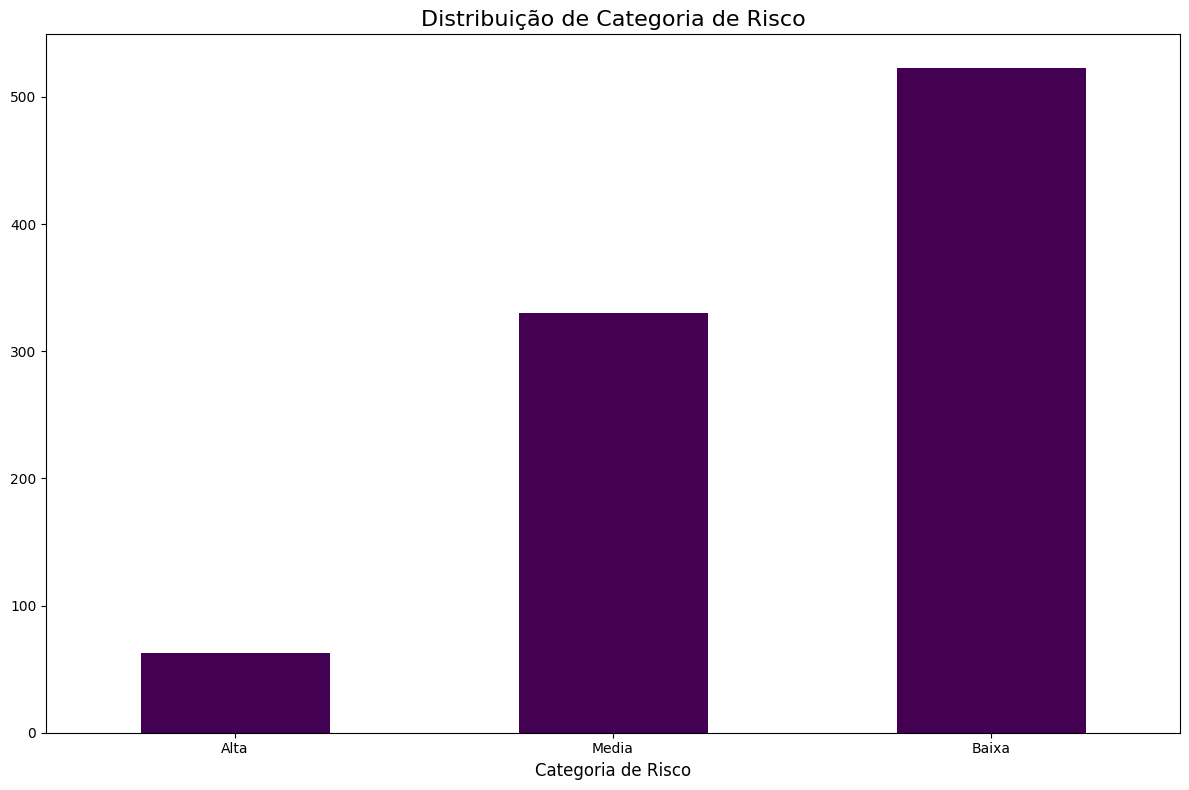

In [20]:

data.columns = data.columns.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('latin-1')

data['Categoria de Risco - CRI'] = data['Categoria de Risco - CRI'].str.strip()

data['Categoria de Risco - CRI'] = data['Categoria de Risco - CRI'].fillna('Media')

ordem_risco = ['Alta', 'Media', 'Baixa']
data['Categoria de Risco - CRI'] = pd.Categorical(data['Categoria de Risco - CRI'], categories=ordem_risco, ordered=True)

risco_contagem = data['Categoria de Risco - CRI'].value_counts().reindex(ordem_risco, fill_value=0)

plt.figure(figsize=(12, 8))
risco_contagem.plot(kind='bar', colormap='viridis')
plt.title('Distribuição de Categoria de Risco', fontsize=16)
plt.xlabel('Categoria de Risco', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Associação entre dano potencial e municipio

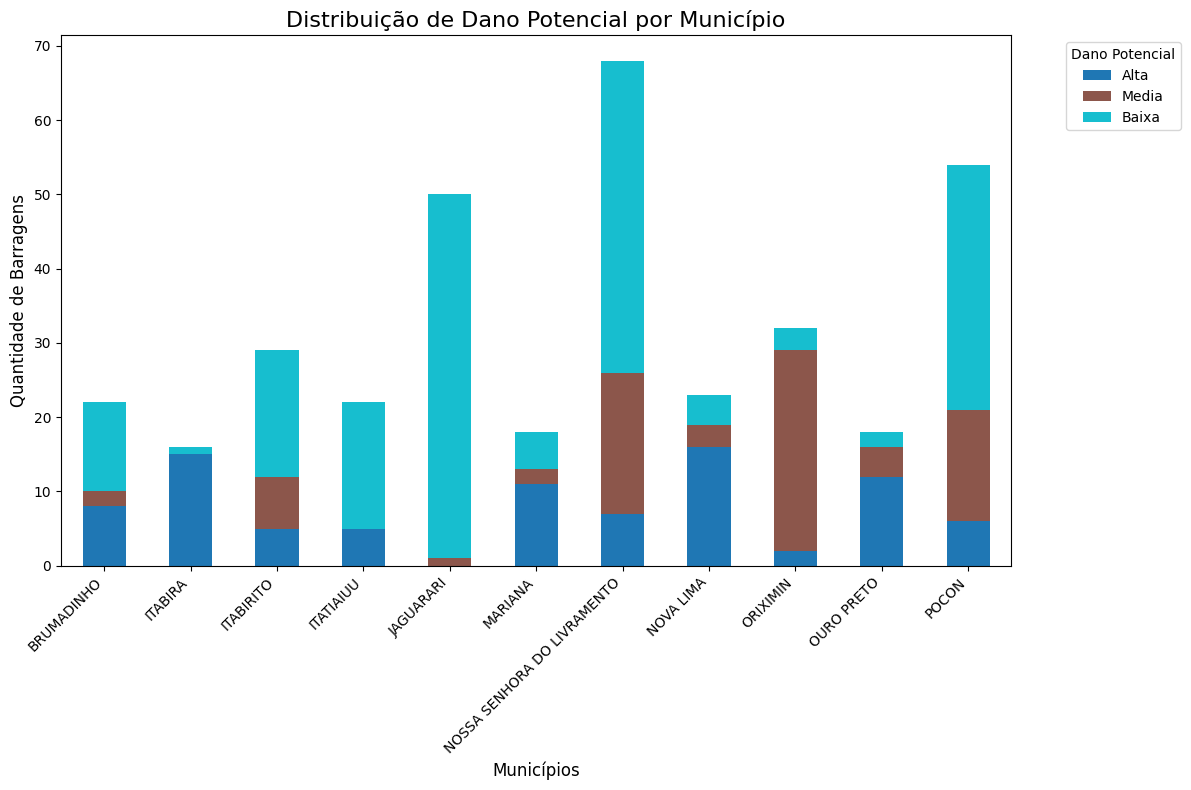

In [21]:
data['Municipio'] = data['Municipio'].apply(corrigir_texto_1)

ordem_dano = ['Alta', 'Media', 'Baixa']
data['Dano Potencial Associado - DPA'] = pd.Categorical(data['Dano Potencial Associado - DPA'], categories=ordem_dano, ordered=True)

municipio_contagem = data.groupby('Municipio').size()
municipios_filtrados = municipio_contagem[municipio_contagem > 15].index
data_filtrada = data[data['Municipio'].isin(municipios_filtrados)]
municipio_dano = data_filtrada.groupby(['Municipio', "Dano Potencial Associado - DPA"], observed=False).size().unstack(fill_value=0)
municipio_dano.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab10')

plt.title('Distribuição de Dano Potencial por Município', fontsize=16)
plt.xlabel('Municípios', fontsize=12)
plt.ylabel('Quantidade de Barragens', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Dano Potencial', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Top 5 empresas com maior número de dano potencial alto

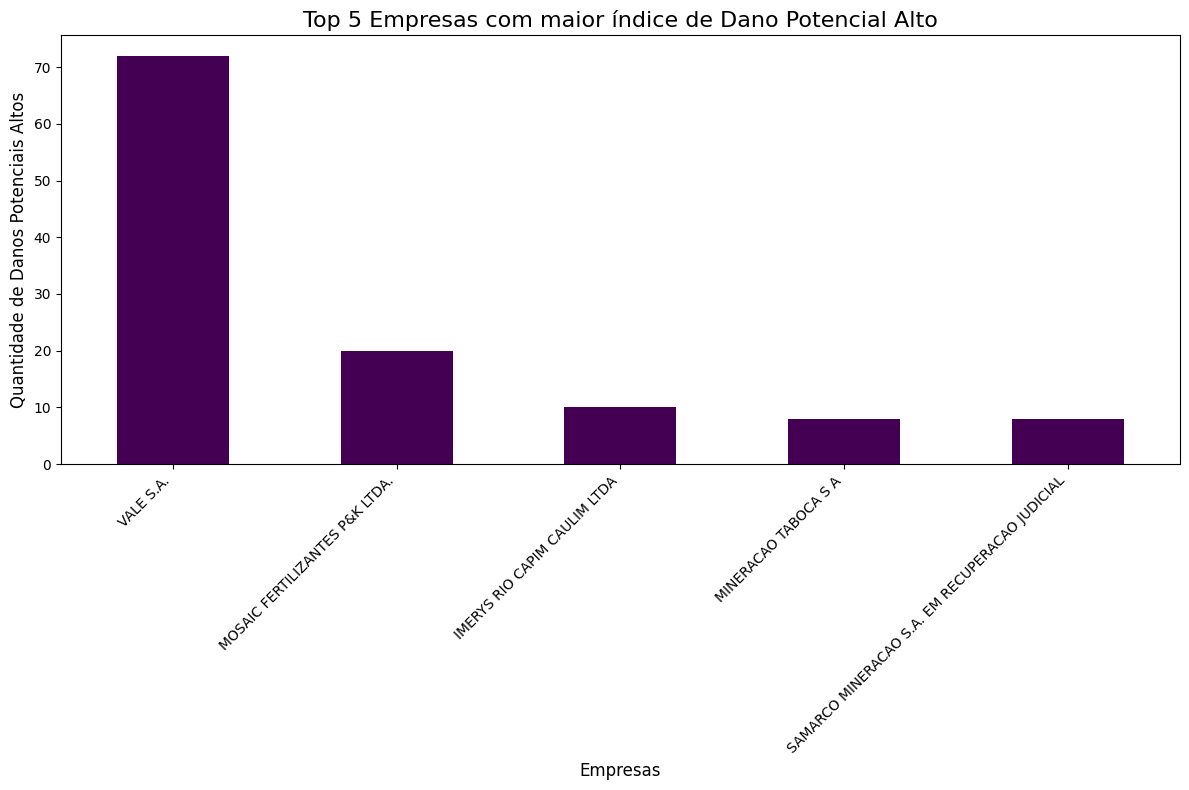

In [22]:
ordem_dano = ['Alta', 'Media', 'Baixa']
data['Dano Potencial Associado - DPA'] = pd.Categorical(data['Dano Potencial Associado - DPA'], categories=ordem_dano, ordered=True)

dano_alto_por_empresa = data[data['Dano Potencial Associado - DPA'] == 'Alta'].groupby('Empreendedor').size()

top_5_empresas_alto = dano_alto_por_empresa.sort_values(ascending=False).head(5)

top_5_empresas_alto.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Top 5 Empresas com maior índice de Dano Potencial Alto', fontsize=16)
plt.xlabel('Empresas', fontsize=12)
plt.ylabel('Quantidade de Danos Potenciais Altos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Top 5 Empresas com Maior Categoria de Risco Alta

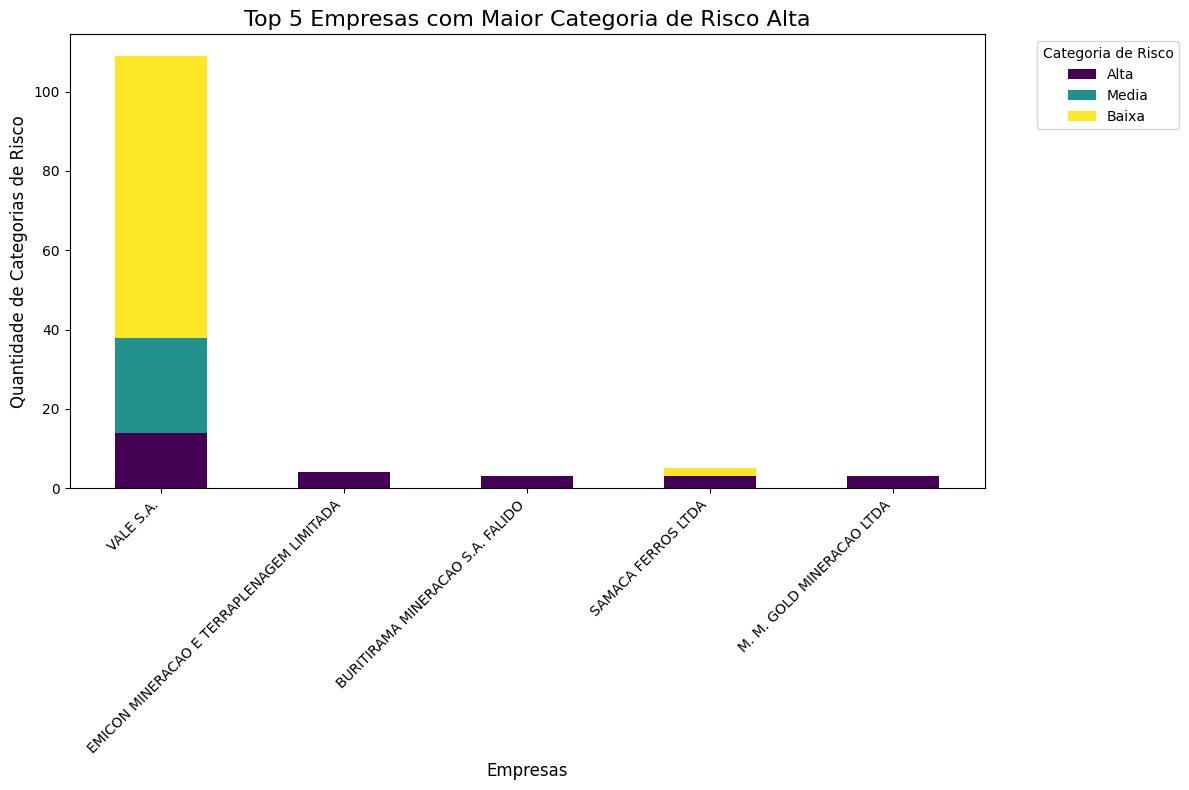

In [23]:
ordem_risco = ['Alta', 'Media', 'Baixa']
data['Categoria de Risco - CRI'] = pd.Categorical(data['Categoria de Risco - CRI'], categories=ordem_risco, ordered=True)

risco_por_empresa = data.groupby('Empreendedor')['Categoria de Risco - CRI'].value_counts().unstack(fill_value=0)

top_5_empresas_alta_risco = risco_por_empresa['Alta'].sort_values(ascending=False).head(5)

risco_top_5 = risco_por_empresa.loc[top_5_empresas_alta_risco.index]

risco_top_5.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Top 5 Empresas com Maior Categoria de Risco Alta', fontsize=16)
plt.xlabel('Empresas', fontsize=12)
plt.ylabel('Quantidade de Categorias de Risco', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Categoria de Risco', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Impacto ambiental por empresa

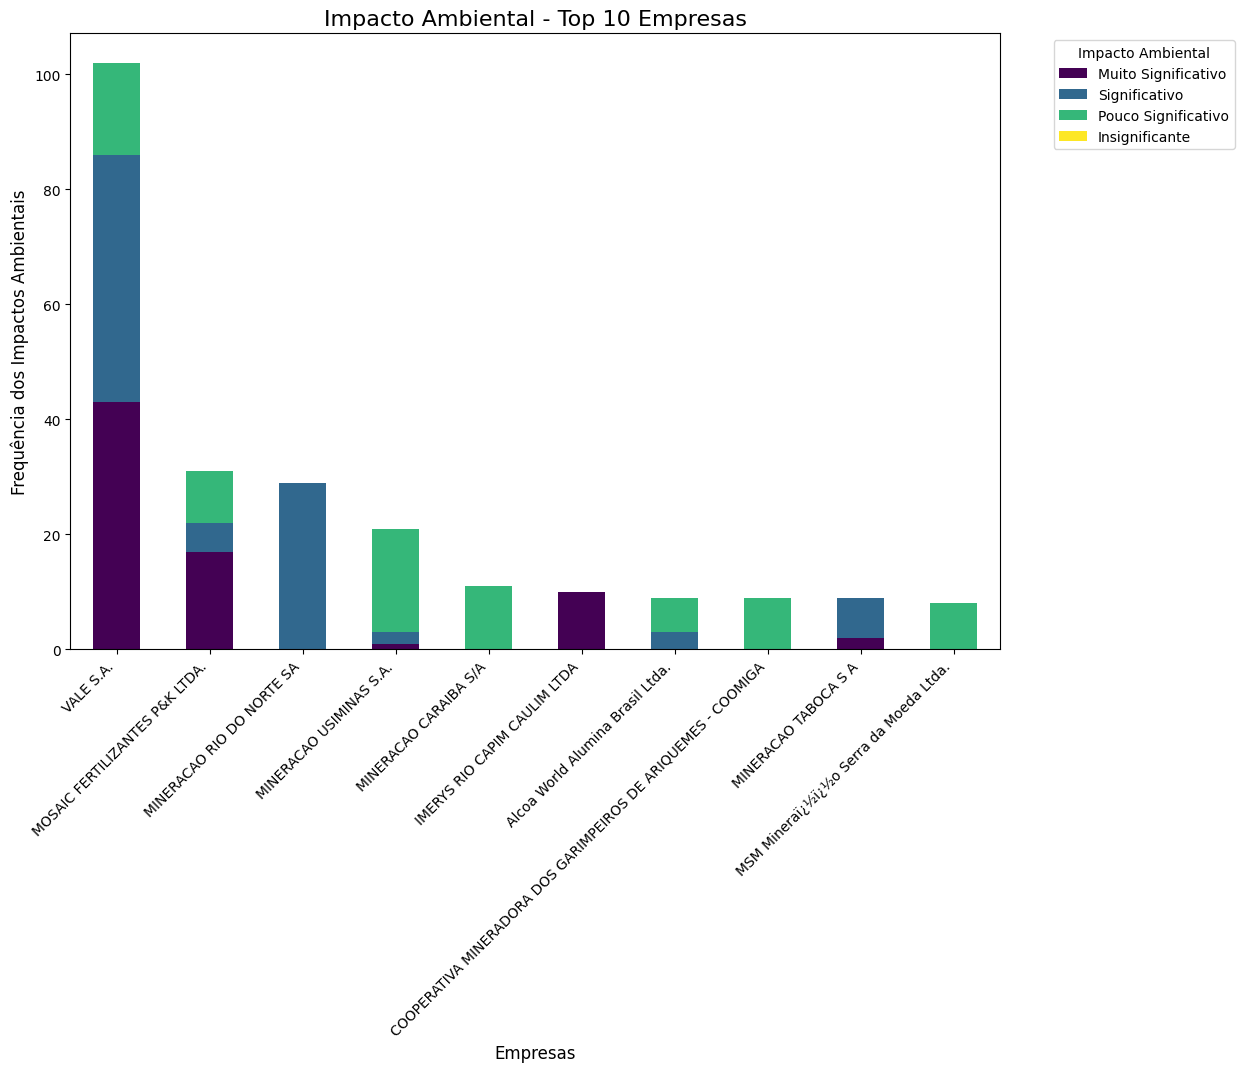

In [6]:
ordem_impacto = ['Muito Significativo', 'Significativo', 'Pouco Significativo', 'Insignificante']

contagem_impacto = (
    data[['Empreendedor', 'Impacto ambiental']]
    .dropna()
    .groupby(['Empreendedor', 'Impacto ambiental'])
    .size()
    .unstack(fill_value=0)
)

contagem_impacto = contagem_impacto[ordem_impacto]


top_10_empresas = contagem_impacto.sum(axis=1).nlargest(10).index
top_10_contagem_impacto = contagem_impacto.loc[top_10_empresas]


plt.figure(figsize=(12, 8))
top_10_contagem_impacto.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())

plt.title('Impacto Ambiental - Top 10 Empresas', fontsize=16)
plt.xlabel('Empresas', fontsize=12)
plt.ylabel('Frequência dos Impactos Ambientais', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title="Impacto Ambiental", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Top 10 Municípios por Soma do Nível de Emergência

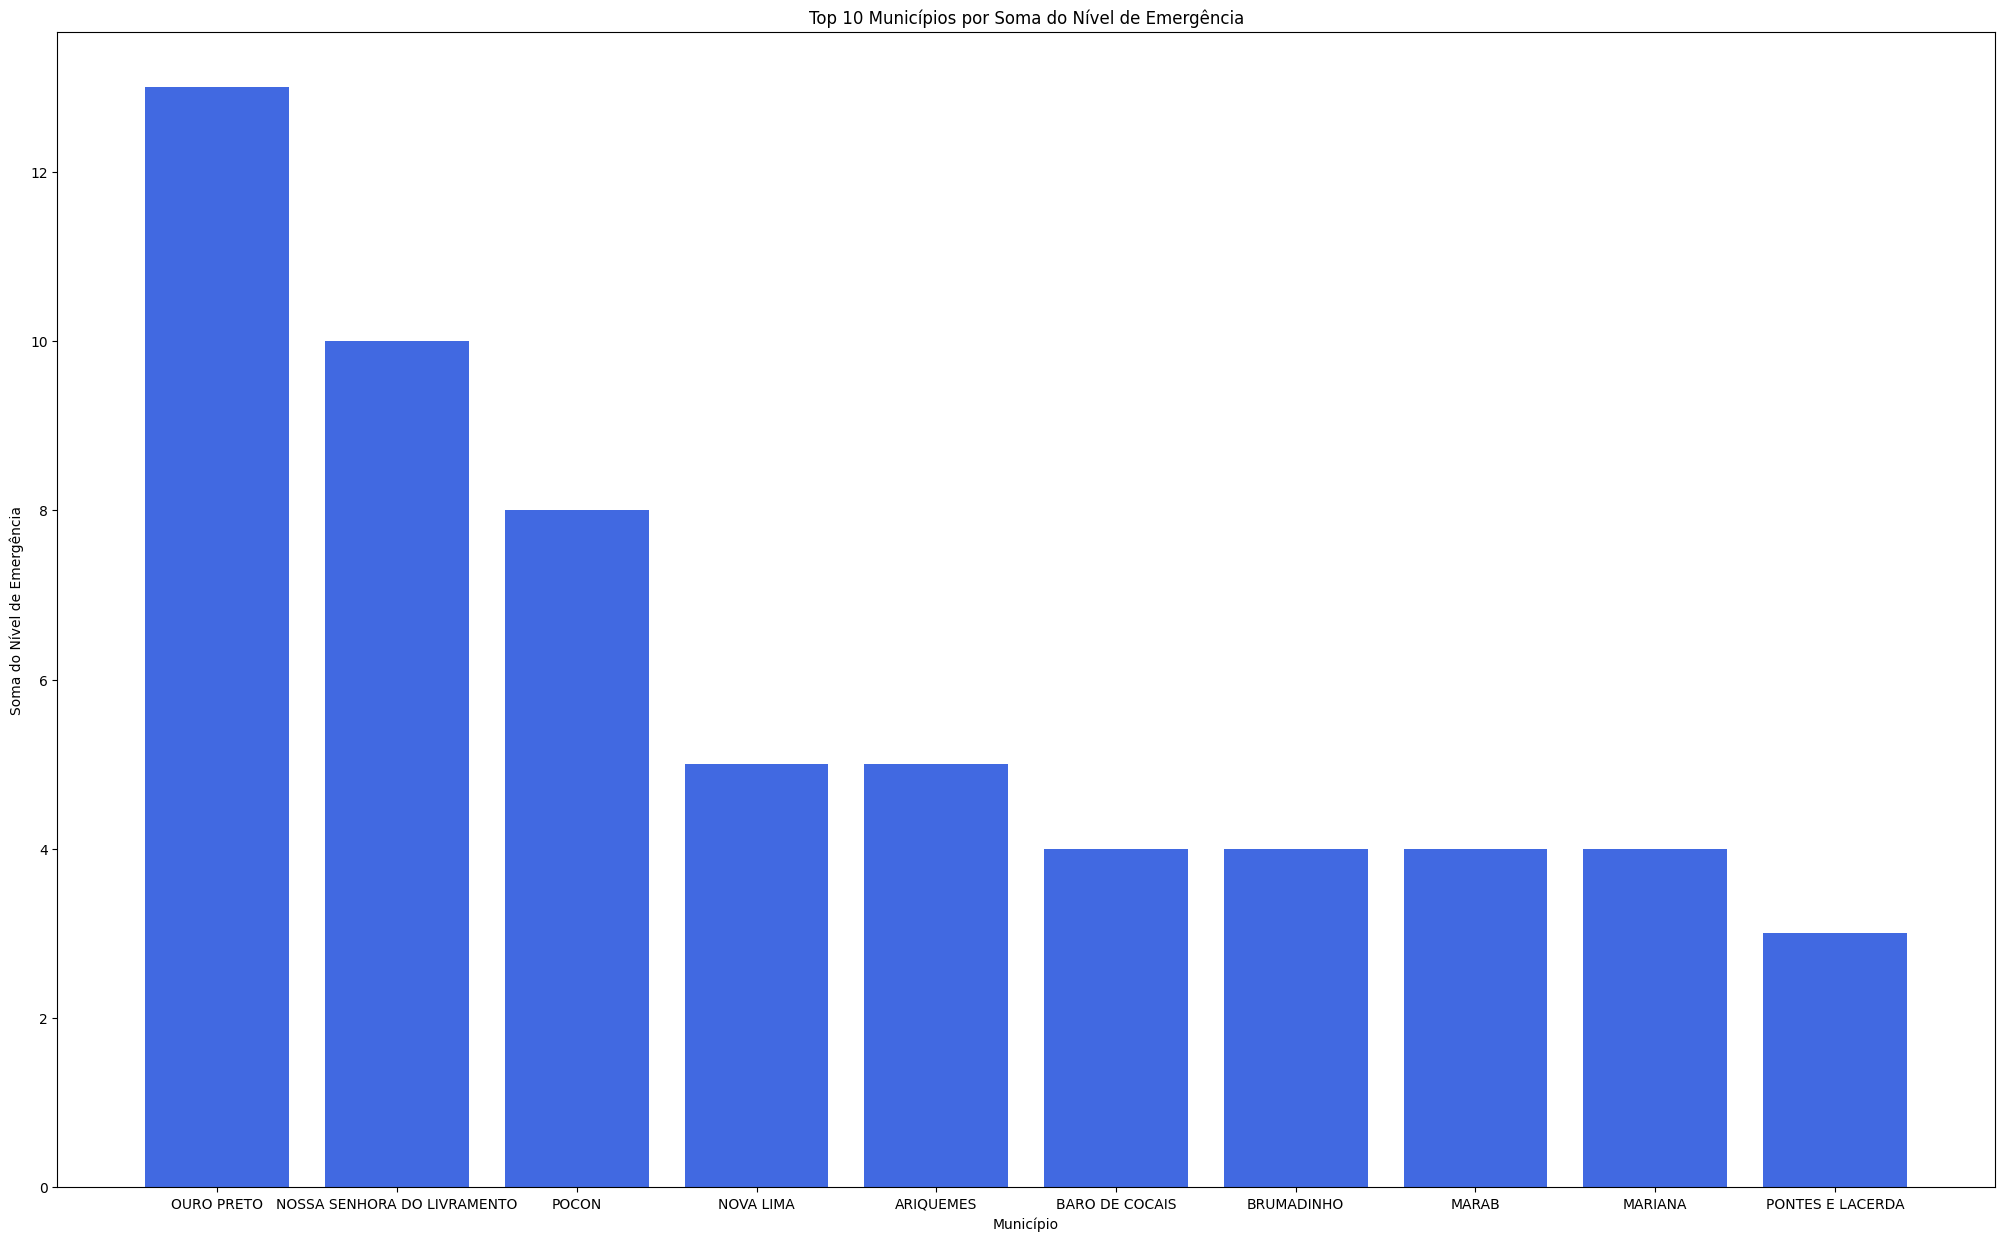

In [25]:
def extrair_numeros(string):
    if string == "Sem emergencia":
        return 0
    elif string == "Nivel de Alerta":
        return 1
    else:
        numeros = ''.join([caractere for caractere in string if caractere.isdigit()])
        return int(numeros)

data ["Municipio"] = data["Municipio"].apply(corrigir_texto_1)
data['numeros_nivel_emergencia'] = data["Nivel de Emergencia"].apply(extrair_numeros)

df_agrupado = data.groupby("Municipio")['numeros_nivel_emergencia'].sum().reset_index()

top_10_municipios = df_agrupado.sort_values(by='numeros_nivel_emergencia', ascending=False).head(10)

plt.figure(figsize=(25, 15))
plt.bar(top_10_municipios['Municipio'], top_10_municipios['numeros_nivel_emergencia'], color='royalblue')
plt.xlabel('Município')
plt.ylabel('Soma do Nível de Emergência')
plt.title('Top 10 Municípios por Soma do Nível de Emergência')
plt.xticks(rotation=0)
plt.show()

## Distribuição de Dano Potencial por Município

**Tese:**

_A estrutura de governança e fiscalização de barragens está insuficiente em municípios com maior concentração de barragens de alto potencial de dano, prejudicando a segurança hídrica e ambiental local._

In [26]:
alto_medio_potencial = data[data['Dano Potencial Associado - DPA'].isin(['Alta', 'Média'])]

barragens_por_municipio = alto_medio_potencial.groupby('Municipio').size()

if len(barragens_por_municipio) < 2:
    print("Aviso: Menos de 2 municípios com barragens de alto/médio potencial de dano.")
else:
    skewness = skew(barragens_por_municipio)
    kurt = kurtosis(barragens_por_municipio)
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurt}")

Skewness: 2.2087978129197463
Kurtosis: 5.179885807600719


Os resultados apoiam a afirmação de que a estrutura de governança e fiscalização está insuficiente em municípios com maior concentração de barragens.

Skewness > 0: A distribuição é assimétrica à direita, indicando que alguns municípios têm um número significativamente maior de barragens.
Kurtosis > 0: A distribuição tem caudas pesadas, indicando a presença de outliers (municípios com um número muito alto de barragens).

### Impacto Ambiental - Top 10 Empresas

**Tese:**

_Algumas empresas concentram um alto número de impactos ambientais negativos, sugerindo uma necessidade urgente de políticas regulatórias mais rígidas e de práticas empresariais mais sustentáveis._

In [51]:
impacto_map = {
    "Insignificante": 1,
    "Pouco Significativo": 2,
    "Significativo": 3,
    "Muito Significativo": 4
}

data['Impacto ambiental numérico'] = data['Impacto ambiental'].map(impacto_map)

data = data.dropna(subset=['Impacto ambiental numérico'])

if len(data['Impacto ambiental numérico']) > 3: 
    skewness = skew(data['Impacto ambiental numérico'])
    kurtosis_value = kurtosis(data['Impacto ambiental numérico'])
    print(f"\nSkewness: {skewness}")
    print(f"Kurtosis: {kurtosis_value}")
else:
    print("\nAmostra insuficiente para calcular skewness e kurtosis.")



Skewness: 0.374645315988602
Kurtosis: -1.4056062909275326



Os resultados indicam que, embora a maioria das empresas tenha impactos baixos ou moderados,
algumas empresas têm impactos ambientais desproporcionalmente altos, 
reforçando a tese de que políticas mais rígidas são necessárias para lidar com essas empresas específicas.

A skewness comprova que há uma concentração de empresas com impactos ambientais mais altos, o que justifica a necessidade de políticas regulatórias mais rígidas para essas empresas.

A kurtosis negativa sugere que os impactos ambientais variam bastante entre as empresas, mas isso não invalida a presença de empresas com impactos significativamente maiores.